# MenuItem Table

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_feather("../Cleaned Data Files/MenuItem-cleaned.feather")

## Description

Each entry is an item (such as a dish) sold through the menu, including the price and when that dish was recorded or modified in the database

* There are 1038119 records across 7 columns

In [22]:
df.shape

(1038119, 7)

In [23]:
df.dtypes

id                int64
menu_page_id      int64
dish_id         float64
created_at       object
updated_at       object
xpos            float64
ypos            float64
dtype: object

In [24]:
df.head(5)

,id,menu_page_id,dish_id,created_at,updated_at,xpos,ypos
0,1,1389,1.0,2011-03-28 15:00:44 UTC,2011-04-19 04:33:15 UTC,0.111429,0.254735
1,2,1389,2.0,2011-03-28 15:01:13 UTC,2011-04-19 15:00:54 UTC,0.438571,0.254735
2,3,1389,3.0,2011-03-28 15:01:40 UTC,2011-04-19 19:10:05 UTC,0.140000,0.261922
3,4,1389,4.0,2011-03-28 15:01:51 UTC,2011-04-19 19:07:01 UTC,0.377143,0.262720
4,5,3079,5.0,2011-03-28 15:21:26 UTC,2011-04-13 15:25:27 UTC,0.105714,0.313178


In [25]:
df.describe(include="all")

,id,menu_page_id,dish_id,created_at,updated_at,xpos,ypos
count,1.038119e+06,1.038119e+06,1.038119e+06,1038119,1038119,1.038119e+06,1.038119e+06
unique,NaN,NaN,NaN,1013595,1015733,NaN,NaN
top,NaN,NaN,NaN,2011-04-21 21:13:28 UTC,2011-04-21 01:49:53 UTC,NaN,NaN
freq,NaN,NaN,NaN,5,4,NaN,NaN
mean,7.360480e+05,5.021323e+04,1.630961e+05,NaN,NaN,3.914971e-01,5.483628e-01
std,3.829472e+05,2.072465e+04,1.646791e+05,NaN,NaN,2.229055e-01,2.241894e-01
min,1.000000e+00,1.300000e+02,1.000000e+00,NaN,NaN,0.000000e+00,3.212330e-03
25%,4.008505e+05,3.686300e+04,6.250000e+03,NaN,NaN,1.828570e-01,3.652270e-01
50%,7.570030e+05,5.595400e+04,9.784700e+04,NaN,NaN,3.800000e-01,5.667420e-01
75%,1.061326e+06,6.721500e+04,3.375005e+05,NaN,NaN,5.706670e-01,7.369900e-01


## Missing Values - Section 3.1

* `price` column is missing 30% of data
* `high_price` column is missing 93% of data

In [26]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.name = 'Percentage of Missing Values'
missing_percentage

id              0.0
menu_page_id    0.0
dish_id         0.0
created_at      0.0
updated_at      0.0
xpos            0.0
ypos            0.0
Name: Percentage of Missing Values, dtype: float64

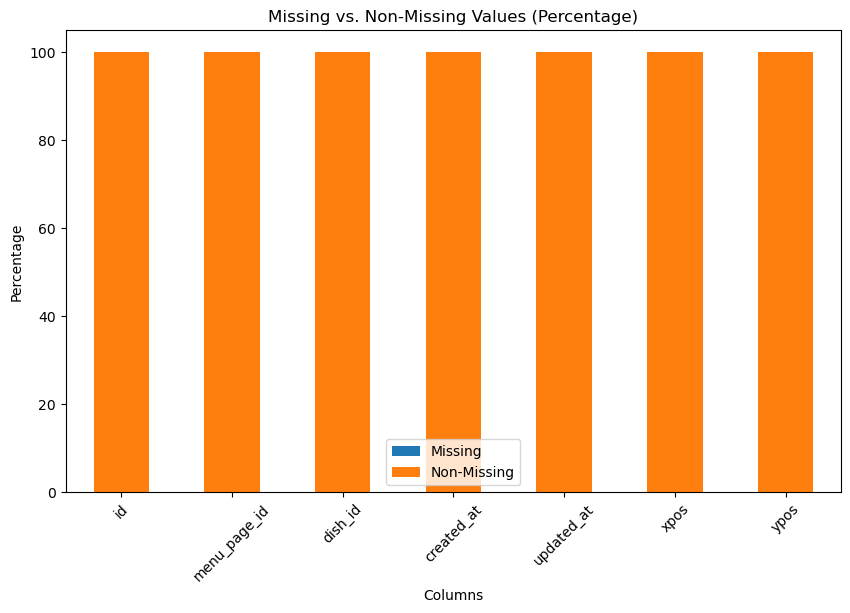

In [27]:
non_missing_percentage = 100 - missing_percentage
missing_data_percentage = pd.DataFrame({'Missing': missing_percentage, 'Non-Missing': non_missing_percentage})
missing_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Missing vs. Non-Missing Values (Percentage)')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

## Foreign Key Violations - Section 3.2

* All `menu_page_id` exists in the **MenuPage** table. No foreign key violations.

In [28]:
df_page = pd.read_feather("../Data Files/MenuPage.feather")

In [29]:
df_page.dtypes

id               int64
menu_id          int64
page_number    float64
image_id        object
full_height    float64
full_width     float64
uuid            object
dtype: object

In [30]:

menupage_ids = df_page['id'].unique()

menuitem_page_ids = df['menu_page_id'].unique()

foreign_key_violations = [id for id in menuitem_page_ids if id not in menupage_ids]

if foreign_key_violations:
    print("Foreign key violations found:", foreign_key_violations)
else:
    print("No foreign key violations found.")

No foreign key violations found.


## Inconsistent Error - Section 3.3

*   A record could not have been updated before being created.

In [31]:
df2 = df.copy()
df2['created_at'] = pd.to_datetime(df2['created_at'], format='%Y-%m-%d %H:%M:%S %Z')
df2['updated_at'] = pd.to_datetime(df2['updated_at'], format='%Y-%m-%d %H:%M:%S %Z')

In [32]:
df2.loc[df2['created_at'] > df2['updated_at']][['created_at', 'updated_at']]

,created_at,updated_at
587,2011-04-19 18:40:33+00:00,2011-04-19 18:39:49+00:00
712,2011-04-19 18:59:03+00:00,2011-04-19 18:58:17+00:00
1442,2011-04-19 20:57:12+00:00,2011-04-19 20:56:41+00:00
1447,2011-04-19 20:59:34+00:00,2011-04-19 20:58:32+00:00
1595,2011-04-19 21:53:27+00:00,2011-04-19 21:52:43+00:00
...,...,...
717235,2012-06-25 02:02:51+00:00,2012-06-25 01:55:57+00:00
717285,2012-06-25 04:05:33+00:00,2012-06-25 03:58:33+00:00
717522,2012-06-25 10:45:45+00:00,2012-06-25 10:38:43+00:00
717579,2012-06-25 12:00:48+00:00,2012-06-25 11:54:09+00:00
